# This script plots the HI mass against the Star Formation Rate
## General plot for all galaxy types
## Plot separating the types of galaxies: centrals, satellites and orphans
### scatter plots for z=0, z=1
### Contour plots for z=0, z=1

In [1]:
# Code to plot the HI Mass as a function of Halo Mass (Mvir)
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge
import random
import sys
from Functions import *

#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int

# Take a random sample of gals (k = 10^4)
#gals_ran = Random_Sample_Gals(gals, 10000)
gals_ran = gals.sample(n=10000)
gals_ran
#gals_ran.shape
gals_ran.columns


Index(['HaloID', 'ID', 'Type', 'CentralGal', 'GhostFlag', 'Len', 'MaxLen',
       'Spin', 'Mvir', 'Rvir', 'Vvir', 'Vmax', 'FOFMvir', 'HotGas',
       'MetalsHotGas', 'ColdGas', 'MetalsColdGas', 'H2Frac', 'H2Mass',
       'HIMass', 'Mcool', 'DiskScaleLength', 'StellarMass', 'GrossStellarMass',
       'MetalsStellarMass', 'Sfr', 'EjectedGas', 'MetalsEjectedGas',
       'BlackHoleMass', 'Rcool', 'Cos_Inc', 'MergTime', 'MergerStartRadius',
       'BaryonFracModifier', 'FOFMvirModifier', 'MvirCrit', 'MergerBurstMass',
       'MWMSA', 'Fesc', 'FescWeightedGSM', 'FescBH', 'BHemissivity',
       'EffectiveBHM', 'BlackHoleAccretedHotMass', 'BlackHoleAccretedColdMass',
       'dt', 'Pos_0', 'Pos_1', 'Pos_2', 'Vel_0', 'Vel_1', 'Vel_2',
       'NewStars_0', 'NewStars_1', 'NewStars_2', 'NewStars_3', 'NewStars_4'],
      dtype='object')

In [2]:
# PRINT UNITS
fname_in = "imapping_testrun/meraxes.hdf5"
units = meraxes.read_units(fname_in)
print('\nunits\n=====')
for k, v in units.items():
    if not isinstance(v, dict):
        print(k, ':', v.decode('utf-8'))
print()


units
=====
BHemissivity : 1e60 photons
BaryonFracModifier : None
BlackHoleAccretedColdMass : 1e10 solMass
BlackHoleAccretedHotMass : 1e10 solMass
BlackHoleMass : 1e10 solMass
CentralGal : None
ColdGas : 1e10 solMass
Cos_Inc : None
DiskScaleLength : Mpc
EffectiveBHM : 1e10 solMass
EjectedGas : 1e10 solMass
FOFMvir : 1e10 solMass
FOFMvirModifier : None
Fesc : None
FescBH : None
FescWeightedGSM : 1e10 solMass
GhostFlag : None
GrossStellarMass : 1e10 solMass
H2Frac : None
H2Mass : 1e10 solMass
HIMass : 1e10 solMass
HaloID : None
HotGas : 1e10 solMass
ID : None
Len : None
MWMSA : Myr
MaxLen : None
Mcool : 1e10 solMass
MergTime : Myr
MergerBurstMass : 1e10 solMass
MergerStartRadius : Mpc
MetalsColdGas : 1e10 solMass
MetalsEjectedGas : 1e10 solMass
MetalsHotGas : 1e10 solMass
MetalsStellarMass : 1e10 solMass
Mvir : 1e10 solMass
MvirCrit : 1e10 solMass
NewStars : 1e10 solMass
Pos : Mpc
Rcool : Mpc
Rvir : Mpc
Sfr : solMass/yr
Spin : None
StellarMass : 1e10 solMass
Type : None
Vel : km/s
Vmax 

In [3]:
# Log the masses 
HIMass = np.log10(gals_ran["HIMass"]*1e10)
print('HIMass: ', HIMass, 'no. items: ', HIMass.shape)
Mvir = np.log10(gals_ran["Mvir"]*1e10)
print('Mvir: ', Mvir, 'no. items: ', HIMass.shape)
Type = gals_ran["Type"]
SFR = gals_ran["Sfr"]

HIMass:  1162743    7.963721
93189      7.264228
766866     7.199883
753512     7.845157
1203211    7.720971
             ...   
1342946    7.470941
934740     7.343644
630232     8.860715
558469     9.466474
1571192    6.781023
Name: HIMass, Length: 10000, dtype: float32 no. items:  (10000,)
Mvir:  1162743    10.298442
93189       9.833554
766866     11.012052
753512     11.401430
1203211    10.096796
             ...    
1342946     9.920705
934740     10.122351
630232     11.646282
558469     11.962726
1571192     9.821321
Name: Mvir, Length: 10000, dtype: float32 no. items:  (10000,)


/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# SCATTER PLOT z=0
## All galaxies

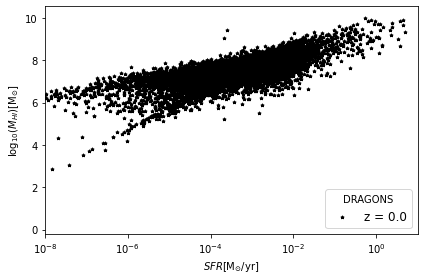

In [4]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + redshift_used)
x = SFR
y = HIMass
plot = ax.scatter(x, y, color= "black", marker= "*", s=10, label=label_z)  

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')

# Add the legend
plt.legend(title=("DRAGONS"),
           loc='lower right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_SRF" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")

# SCATTER PLOT z=0
## separated galaxies, Centrals, Satellites, and Orphans

"\noccurrences_cen = np.count_nonzero(Type == 0)\noccurrences_sat = np.count_nonzero(Type == 1)\noccurrences_all = np.count_nonzero(gals)\nprint('Num Centrals = ', occurrences_cen)\nprint('Num Satellites = ', occurrences_sat)\nprint('Num All = ', occurrences_all)\n"

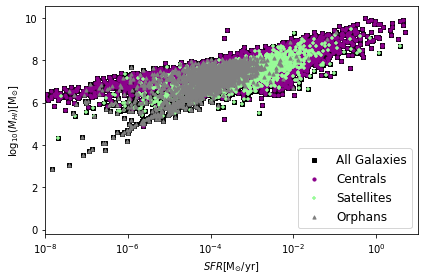

In [5]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used))
x = SFR
y = HIMass
all_plt = ax.scatter(x, y, color= "black", marker= "s", s=10)  
centrals_plt = ax.scatter(x[Type==0], y[Type==0], color= "darkmagenta", marker= "o", s=10)  
satellites_plt = ax.scatter(x[Type==1], y[Type==1], color= "palegreen", marker= "+", s=10)  
orphans_plt = ax.scatter(x[Type==2], y[Type==2], color= "gray", marker= "^", s=10)  

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')
# Add the legend
plt.legend((all_plt, centrals_plt, satellites_plt, orphans_plt),
           ('All Galaxies', 'Centrals', 'Satellites', 'Orphans'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)


# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_SFR_CenSatAll" + redshift_used)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''

# z=1

In [6]:
#get gals, snaps, sims_props
snapshot_used_1 = 192 # z = 0
gals_1, sim_props_1, snaplist_1 = get_gal_catalogue(snapshot_used_1)

snaplist_index_used_1 = list(snaplist_1[0]).index(snapshot_used_1)# convert to list and find the index of the snap we are using
redshift_used_1 = snaplist_1[1][snaplist_index_used_1] # Get the redshift for corresponding snapshot
redshift_used_1 = str(round(redshift_used_1, 1)) # round float to nearest whole int

# Take a random sample of gals (k = 10^4)
#gals_ran = Random_Sample_Gals(gals, 10000)
gals_ran_1 = gals_1.sample(n=10000)
gals_ran_1
#gals_ran.shape
gals_ran_1.columns
# Log the masses 
HIMass_1 = np.log10(gals_ran_1["HIMass"]*1e10)
print('HIMass: ', HIMass_1, 'no. items: ', HIMass_1.shape)
Mvir_1 = np.log10(gals_ran_1["Mvir"]*1e10)
print('Mvir: ', Mvir_1, 'no. items: ', Mvir.shape)
Type_1 = gals_ran_1["Type"]
SFR_1 = gals_ran_1["Sfr"]

HIMass:  541294     7.718090
404731     6.630796
652553     7.728344
272130     7.753487
630015     7.986963
             ...   
1243686    8.330816
882910     7.885941
1598129    7.527072
1634629    8.398712
457831     7.041376
Name: HIMass, Length: 10000, dtype: float32 no. items:  (10000,)
Mvir:  541294      9.833554
404731      9.833554
652553      9.821321
272130     10.180342
630015     10.009646
             ...    
1243686    10.573917
882910      9.795766
1598129     9.821321
1634629    10.103327
457831      9.782402
Name: Mvir, Length: 10000, dtype: float32 no. items:  (10000,)


/Users/jenkinsfamily/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# SCATTER PLOT z=1
## All galaxies

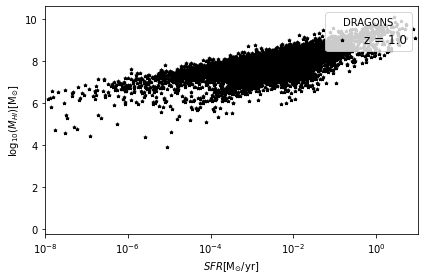

In [7]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z_1 = ("z = " + redshift_used_1)
x_1 = SFR_1
y_1 = HIMass_1
plot = ax.scatter(x_1, y_1, color= "black", marker= "*", s=10, label=label_z_1)  

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')

# Add the legend
plt.legend(title=("DRAGONS"),
           loc='upper right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_SRF" + redshift_used_1)
plt.savefig("plots/" + name_of_plot + ".pdf")

## Separated galaxies: Centrals, Satellites and Orphans.

"\noccurrences_cen = np.count_nonzero(Type == 0)\noccurrences_sat = np.count_nonzero(Type == 1)\noccurrences_all = np.count_nonzero(gals)\nprint('Num Centrals = ', occurrences_cen)\nprint('Num Satellites = ', occurrences_sat)\nprint('Num All = ', occurrences_all)\n"

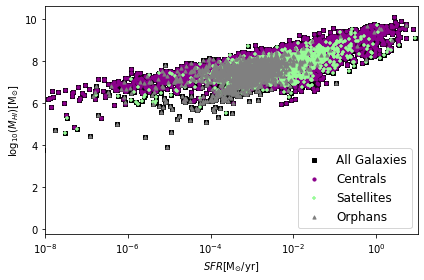

In [8]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used_1))
x_1 = SFR_1
y_1 = HIMass_1
all_plt_1 = ax.scatter(x_1, y_1, color= "black", marker= "s", s=10)  
centrals_plt_1 = ax.scatter(x_1[Type_1==0], y_1[Type_1==0], color= "darkmagenta", marker= "o", s=10)  
satellites_plt_1 = ax.scatter(x_1[Type_1==1], y_1[Type_1==1], color= "palegreen", marker= "+", s=10)  
orphans_plt_1 = ax.scatter(x_1[Type_1==2], y_1[Type_1==2], color= "gray", marker= "^", s=10)  

ax.set_xlabel(r"$SFR [{\rm M_{\odot}/yr}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_xlim([1e-8,1e1])
plt.xscale('log')
# Add the legend
plt.legend((all_plt_1, centrals_plt_1, satellites_plt_1,orphans_plt_1 ),
           ('All Galaxies', 'Centrals', 'Satellites', 'Orphans'),
           scatterpoints=1,
           loc='lower right',
           fontsize=12)


# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_SFR_CenSatAll" + redshift_used_1)
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''

# Countour Plot 

In [9]:
x = SFR
y = HIMass
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
z.shape

<ipython-input-9-44810a703a90>:4: RuntimeWarning: invalid value encountered in sin
  z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)


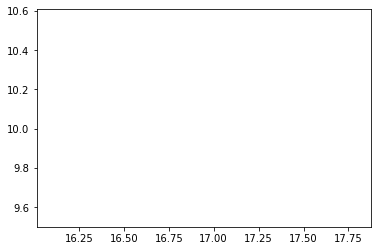

In [21]:
pltcontour = plt.contour(x, y, z)

(10000, 10000)